In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [57]:
df =  pd.read_csv('titanic-2.csv')

In [58]:
titanic_data = df.drop(['Name','Ticket','Cabin'],axis=1)

In [59]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [60]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

C:\Users\jay\AppData\Local\Temp\ipykernel_6300\4154180430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\jay\AppData\Local\Temp\ipykernel_6300\4154180430.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [61]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])


In [62]:
X = titanic_data.drop('Survived',axis=1)
y = titanic_data['Survived']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
def choose_k(X_train, y_train, X_test, y_test, max_k=10):
    k_values = list(range(1, max_k+1))
    accuracy_values = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    
    # Visualize the accuracy for different k values
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
    plt.title('Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_k = k_values[accuracy_values.index(max(accuracy_values))]
    return best_k

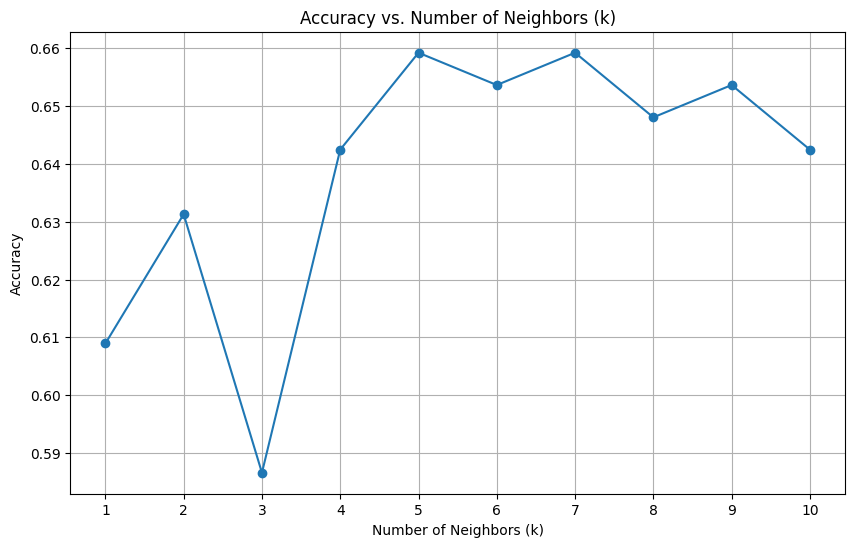

Best k: 5


In [65]:
best_k = choose_k(X_train, y_train, X_test, y_test)
print("Best k:", best_k)

In [66]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.659217877094972
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       105
           1       0.64      0.41      0.50        74

    accuracy                           0.66       179
   macro avg       0.65      0.62      0.62       179
weighted avg       0.65      0.66      0.64       179

